# Pre-lecture HW

# 1. (Histogram)

In [25]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a figure
fig = go.Figure()

# Loop through each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    lower_2sd = mean - 2 * species_data.std()
    upper_2sd = mean + 2 * species_data.std()
    iqr = species_data.quantile(0.75) - species_data.quantile(0.25)

    # Histogram
    fig.add_trace(go.Histogram(
        x=species_data,
        name=species,
        opacity=0.75,
        histnorm='probability',
        nbinsx=20
    ))
    
    # Add lines for mean and median
    fig.add_vline(mean, line_width=2, line_dash="dash", line_color="blue", 
                  annotation_text="Mean", annotation_position="top right")
    fig.add_vline(median, line_width=2, line_dash="dash", line_color="red", 
                  annotation_text="Median", annotation_position="top left")
    
    # Add rectangles for 2 SDs
    fig.add_shape(type="rect",
                  x0=lower_2sd, x1=upper_2sd,
                  y0=0, y1=0.25,  # Adjust the height if needed
                  fillcolor="green", opacity=0.2, line_width=0)

# Update layout
fig.update_layout(
    title='Flipper Length Distribution by Species',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Probability',
    barmode='overlay'
)

# Show the plot
fig.show()

# 2. (KDE)

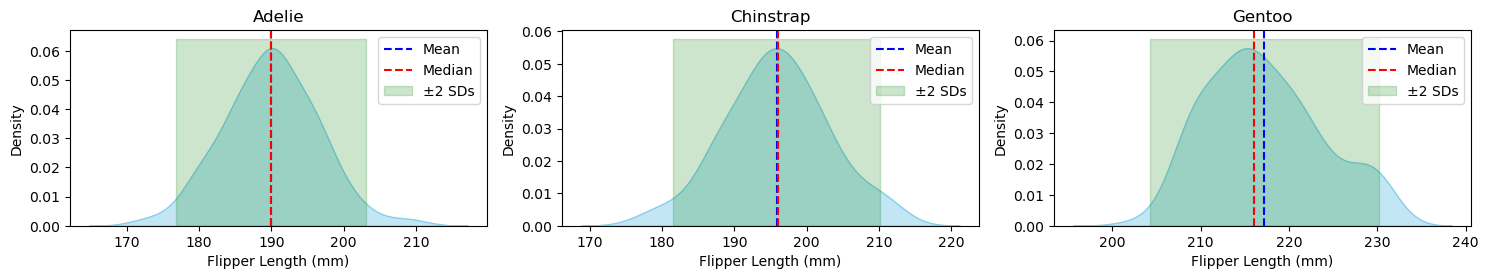

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Set up the figure with subplots
num_species = penguins['species'].nunique()
fig, axes = plt.subplots(nrows=(num_species // 3) + 1, ncols=3, figsize=(15, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each species and create a KDE plot
for ax, species in zip(axes, penguins['species'].unique()):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    lower_2sd = mean - 2 * species_data.std()
    upper_2sd = mean + 2 * species_data.std()

    # Create the KDE plot
    sns.kdeplot(species_data, ax=ax, fill=True, alpha=0.5, color='skyblue')
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='red', linestyle='--', label='Median')
    
    # Add shaded region for 2 standard deviations
    ax.fill_betweenx([0, ax.get_ylim()[1]], lower_2sd, upper_2sd, color='green', alpha=0.2, label='±2 SDs')
    
    # Set title and labels
    ax.set_title(species)
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Hide any unused subplots
for i in range(len(penguins['species'].unique()), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

# 3. (explanation)

#### I think that I have a preference for histograms. Histograms are more simple and easy to create/interpret as opposed to other data visualization options. I find that histograms are more easy to visualize in comparison to box plots, which can often be lacking in detail on the type of distribution (i.e shape). Though they may cause issues with their sensitivity to bin size, I still have a preference for histograms as they can be very easy to apply and interpret for large data sets. 

# 4. running code, answering questions.

In [24]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# answer questions: 
    
## 4.1: Which datasets have similar means and similar variances

#### 4.1: Graphs A, B, and C will have similar means. In graph A, since it has a uniform distribution, its mean can be calculated by the (max-min)/2, which points to around 5. For graph B, because it has a normal distribution peak, and it is roughly around 5, then its mean can be estimated around 5. For graph C, it is a bimodal distribution, which means that the mean will be roughly the middle of the 2 peaks, and in this case it is around 5. However, for D which is also a normal distribution, its peak looks to be around 6 or so, showing it to have a different mean. As for their variances, after asking ChatGPT to calculate for the variances, B and D have lower variances of 2.25 and 0.25, respectively, whereas A and C have higher variances of around 8.33 and 9.16. Therefore, the datasets with a similar mean and a similar variance is A and C. 

## 4.2: Which datasets have similar means but quite different variances
#### 4.2: As mentioned previously, A, B, and C, all have a similar mean, but C would have the most difference in variance out of the 3, with a variance of 9.16, compared to 2.25 and 0.25. 


## 4.3: Which datasets have similar variances but quite different means
#### 4.3: As mentioned before A and C have a similar variance, (8.33, and 9.16, respectively), but have around the same mean. However, B and D also have somewhat similar variances (2.25 and 0.25 respectively), and do have different means. 

## 4.4: Which datasets have quite different means and quite different variances
#### 4.4: Graph D has a different mean from all the others and is the most different in variance to graph C. D has a variance of 0.25 and C has a variance of 9.16. 

# Post-lecture HW
# 5. (explanation)

#### What is the relationship between the mean and median and "right" and "left" skewness and what causes this?
#### In a right skewed distribution, the mean will be bigger than the median because of very high values pulling the mean upward. In a left skewed distribution, the mean will be smaller than the median because of very low values pulling the mean downward. This skewness happens as a result of very high/low outliers. 

In [10]:
# original code
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

In [3]:
# new code with comments 

from scipy import stats
import pandas as pd
import numpy as np

# Step 1: Generates a random sample from a gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Step 2: Creates a histogram of the sample data
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Histogram of Gamma Sample")
fig1.show()  # Shows the histogram

# Step 3: Calculates and prints the mean of the sample
mean_sample1 = sample1.mean()
print(f"Mean of sample1: {mean_sample1}")

# Step 4: Calculates and prints the median of the sample
median_sample1 = np.quantile(sample1, [0.5])[0]
print(f"Median of sample1: {median_sample1}")

# Step 5: Generates a second sample of negative values from the gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

Mean of sample1: 3.991175112171145
Median of sample1: 3.3671966824632347


# 6. 

In [12]:
#to show summary statistics

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display summary statistics
print(df.describe())

# Calculate and print the mean and median for calories
print(f"Mean Calories: {df['calories'].mean()}")
print(f"Median Calories: {df['calories'].median()}")


       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199      

Mean Calories: 296.14933333333335
Median Calories: 260.0


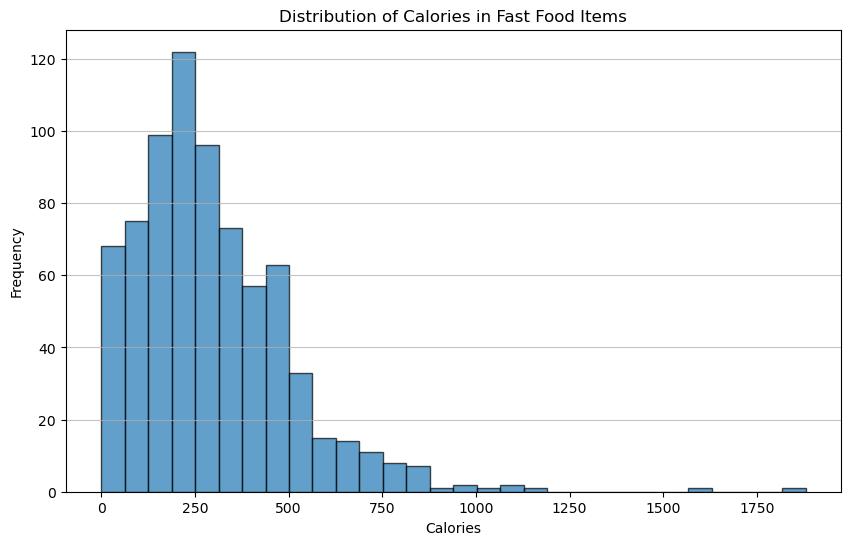

In [16]:
# to visualize the data

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Calculate and print the mean and median for calories
print(f"Mean Calories: {df['calories'].mean()}")
print(f"Median Calories: {df['calories'].median()}")

# Plot a histogram of the Calories column
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### It shows that the data is skewed right. It has a high mean (296.1 calories) and some very big outliers that pull it upward, while the mean stays at 260. 

# 7. watch video, animate data.

In [20]:
import pandas as pd
import plotly.express as px

url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Drop rows with NaN values in the relevant columns
df_cleaned = df.dropna(subset=["calories", "total fat (g)", "sodium (mg)", "category id"])

# Create a scatter plot
fig = px.scatter(df_cleaned, 
                 x="calories", 
                 y="total fat (g)", 
                 animation_frame="restaurant id",
                 animation_group="item id", 
                 size="sodium (mg)", 
                 color="category id",
                 hover_name="item id", 
                 log_x=True, 
                 size_max=55)
fig.show()

# 8. Provide a second version of the figure from the previous problem

In [23]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)


# Drop rows with NaN values in the relevant columns 
df_cleaned = df.dropna(subset=["calories", "total fat (g)", "sodium (mg)", "category id"])

# Create a scatter plot
fig = px.scatter(df_cleaned, 
                 x="calories",  
                 y="total fat (g)",  
                 animation_frame="restaurant id", 
                 animation_group="item id",  
                 size="sodium (mg)",  
                 color="category id", 
                 hover_name="item id",  
                 size_max=50)  

fig.show()

# 9. yes, mostly

# Chatbot summaries and logs


## Chat log 1: https://chatgpt.com/share/66f62a8f-768c-8003-9b83-5ab042426459
### Certainly! Here’s a summary of our chat:
### Homework Question: You asked for help on how to use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark statistical features (mean, median, range, interquartile range, and standard deviations) on Plotly histograms for the flipper_length_mm variable in the penguins dataset.
### Initial Code: I provided a detailed code snippet that calculates the required statistics and generates histograms for each species, marking the mean, median, and various ranges.
### Simplified Code: You requested a simpler version of the code, which I provided, focusing on fewer calculations while retaining key functionality.
### Seaborn KDE Graph: You then asked for a seaborn kernel density estimation graph with the same information, organized in rows of three plots. I provided an initial version of that code.
### Code Correction: After you asked for fixes, I provided a corrected and polished version of the seaborn KDE code that includes statistical overlays and organizes the plots appropriately.
### If you need further assistance or have any other questions, feel free to ask!


## chat log 2: https://chatgpt.com/share/66f62afd-992c-8003-9639-528105f27f63

### In this chat, Julia discussed her understanding of histograms, box plots, and kernel density estimations (KDE), accurately defining each type of data visualization. She highlighted that histograms represent data frequency across bins, box plots show quartile distributions and outliers, and KDE provides a smooth estimation of data distribution. The conversation then explored the pros and cons of each visualization method: histograms are simple but sensitive to bin size, box plots summarize statistics effectively but lack detail on distribution shape, and KDE offers a smooth view of distribution but can be sensitive to bandwidth choice. Overall, the discussion emphasized the strengths and weaknesses of each visualization method and the importance of context in selecting the appropriate one for data analysis.

## chat log 3: https://chatgpt.com/share/66f62b38-7b70-8003-b0cd-bac695306c09

### In this chat, we analyzed four datasets generated from different statistical distributions to determine their means and variances. The datasets include a uniform distribution (data1), two normal distributions (data2 and data4), and a mixture of two normals (data3). We found that data1, data2, and data3 share similar means of 5, while data4 has a slightly higher mean of 6. Regarding variance, data1 and data3 have similar higher variances of approximately 8.33 and 9.16, respectively, whereas data2 and data4 exhibit lower variances of 2.25 and 0.25, respectively, with data2 and data4 being more similar to each other.

## chat log 4: https://chatgpt.com/share/66f62b81-4484-8003-85d5-a9d30410f02b

### In this chat, we explored the relationship between the mean and median concerning skewness in distributions. It was explained that in right-skewed distributions, the mean is typically greater than the median, while in left-skewed distributions, the mean is usually less than the median. This sensitivity of the mean to extreme values helps indicate the skewness of the data. Additionally, we examined a provided code snippet that generates two samples from a gamma distribution, calculates their means and medians, and visualizes one sample using a histogram. The second sample is transformed to create a left-skewed distribution, illustrating the concept of skewness practically.

## chat log 5: https://chatgpt.com/share/66f62bdb-6fc8-8003-95c6-46a4143a02e9

### In this chat session, you sought guidance on updating a Python code snippet to incorporate summary statistics and visualizations using a dataset related to fast food nutrition. After reviewing your initial code, I suggested adding summary statistics through the describe() method and calculating specific metrics such as mean and median for the "Calories" column.
### Subsequently, you expressed interest in visualizing the data using a histogram. I provided a concise code update that included the creation of a histogram to illustrate the distribution of calorie counts among fast food items, along with relevant title and label settings for clarity. The session focused on enhancing your data analysis by integrating simple yet effective statistical insights and visual representations.

## chat log 6: https://chatgpt.com/share/66f62c31-0058-8003-82e0-4d67ff17d288

### In this chat, you initially provided a Plotly scatter plot code using the Gapminder dataset and requested modifications to adapt it for a different dataset containing nutritional information. You specified new axes, size, color, and animation parameters for the scatter plot based on the columns of the new dataset. However, upon implementing the code, you encountered several errors related to incorrect column names and the presence of NaN values.
### To address these issues, I guided you through checking the actual column names in the DataFrame to ensure compatibility with your desired visualizations. I also suggested cleaning the data by removing NaN values from relevant columns before creating the scatter plot. Ultimately, I provided code adjustments and explanations to help you successfully implement the visualizations using the nutritional dataset.